# Comparing loss of life years in two different COVID-19 public policies in Israel:
## Extreme lockdown
## No social distancing (runaway scenario)
* In case of no social distancing or other steps to limit the corona, many people will die
* In case of extreme quarantine, we will lose resources (shrinking economy), leading to less available resources (private and public) for the health system. This will also result in loss of life.
* Main data sources:
    - Models of the health bureau for no social distancing epidemic: https://www.themarker.com/news/health/1.8680993
    - Estimates for damgage to the Israeli GDP by finance bureau, in case of extreme quarantine: for instance https://www.themarker.com/markets/1.8705742
    - Demographics in Israel (Central bureau of statistics):
        * https://www.cbs.gov.il/he/publications/Pages/2019/%D7%91%D7%A8%D7%99%D7%90%D7%95%D7%AA-%D7%A9%D7%A0%D7%AA%D7%95%D7%9F-%D7%A1%D7%98%D7%98%D7%99%D7%A1%D7%98%D7%99-%D7%9C%D7%99%D7%A9%D7%A8%D7%90%D7%9C-2019-%D7%9E%D7%A1%D7%A4%D7%A8-70.aspx
        * https://www.cbs.gov.il/he/publications/Pages/2018/%D7%91%D7%A8%D7%99%D7%90%D7%95%D7%AA-%D7%A9%D7%A0%D7%AA%D7%95%D7%9F-%D7%A1%D7%98%D7%98%D7%99%D7%A1%D7%98%D7%99-%D7%9C%D7%99%D7%A9%D7%A8%D7%90%D7%9C-2018-%D7%9E%D7%A1%D7%A4%D7%A8-69.aspx
    - Health spending (same as the above)
    - Residual life exectnacy: how many year is a person in a given age expected to live more. For instance: A newborn today has a residual life expectancy of ~80 years. A 100 years old person has a life expectancy of ~1 year (same as the above)
* 2 main sub analyses and their assumptions (in separated notebooks):
    - In case of no social distancing: quantification of lost life years (people that die becuase of COVID-19 live less then their residual life expectancy)
        * Assumption: dying from COVID-19 is statistically independent to dying anyway this year. This gives an upper bound of net additional life years lost by COVID-19, since people with underlying risk factors are more likely to die naturally or due to COVID-19. This bound may be improved in further analysis.
    - The effect of health spending on residual life expectancy, which enables estimating loss of life years related to health-spending-cutss.
        * Assumption: the improvement of residual life expectancy is 50% due to additional resources, and 50% due to technological improvement. This seems like a rough but fair assumption in an era excluding huge wars or revolutions such as sewage systems
        * Assumption: the resources loss on health spending is proportional to the loss of resources for everything. That is, that the priorities are the same. This is justified since we can give more resources to health in any public policy, either in extreme quarantine or in no social distancing.
* What this analysis doesn't cover:
    - Epidemics model. I currently use the predictions of the health bureau
    - Model for predicting the effect of quarantine on the GDP. I use predictions of finance bureau
    - Public policies other then these two (currently)
    - Effects of loss of resources on life loss other then through health spending, such as degenerated infrastructure, unemployment, quarantined elderly not exposed to enough sunlight etc
* Some nit-picking:
    - In some cases I use data of a close year (2017 instead of 2019 for instance) since I couldn't find the original data, or mixing NIS of 2015 with NIS of 2019 without adjusting. However, I think that I have done so in a reasonable for a 0-th order estimae

In [2]:
1400 * 0.01 * 5.9


82.60000000000001

In [7]:
IS_SAVEFIG = True
IS_PLOT = True
IS_PARAMETERS_FROM_FILE = False

In [8]:
from pathlib import Path
from pprint import pprint
import yaml

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [13.5, 4.5]#[18, 6]
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.which'] = 'both'
matplotlib.rcParams['axes.formatter.limits'] = (-5, 8)
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['font.size'] = 14

# IF COLAB : uncomment this code, and run it instead of local

In [9]:
#!git clone https://gavishnoam@bitbucket.org/gavishnoam/corona_residual_life_expectancy.git

In [10]:
#path_data = Path("./corona_residual_life_expectancy/data")
#from corona_residual_life_expectancy.pandas_utils import extract_interval_end_from_text, text_interval_index_to_interval_index, reduce_histogram_resolution, closed_ranges_to_interval_index, rougher_binning
#import corona_residual_life_expectancy.parameters as parameters

In [16]:
if IS_PARAMETERS_FROM_FILE:
    import parameters
else:
    import collections

    parameters_dict = {
      'est_israel_gdp_2019_billions_of_nis' : 1400,
      'est_ministry_of_finance_damage_billions_of_nis' : {1 : 90, 2 : 130, 3 : 180, 4 : 250, '1D': 170, 'F' : 82},
      'corona_mortality_tot' : {1 : 8600, 2 : 12700, 3 : 15700, 4 : 21600, '1B' : 4000, '2B' : 10000, '1D' : 12800},

      # reasonable estimaes:
      'health_spending_weight_in_residual_life_expectancy' : 0.5 ,#approx, the rest is technology

      # other assumptions:
      'corona_normal_death_overlap_model' : 'independent',

      # scenario
      'scenario_number' : 'F',
      'MOF_scenario' : 'F',
      'MOH_scenario' : 4
    }

    MyTuple = collections.namedtuple('MyTuple', sorted(parameters_dict))
    parameters = MyTuple(**parameters_dict)

# IF LOCAL

In [17]:
from pandas_utils import extract_interval_end_from_text, text_interval_index_to_interval_index, reduce_histogram_resolution, closed_ranges_to_interval_index, rougher_binning

path_data = Path("../data")
#path_data = Path('https://bitbucket.org/gavishnoam/corona_residual_life_expectancy/raw/55a587e6bf45468aab6601ce43a991da6aed975b/data/')
path_results = Path("../analysis_results")

#pprint(list(path_results.iterdir()))

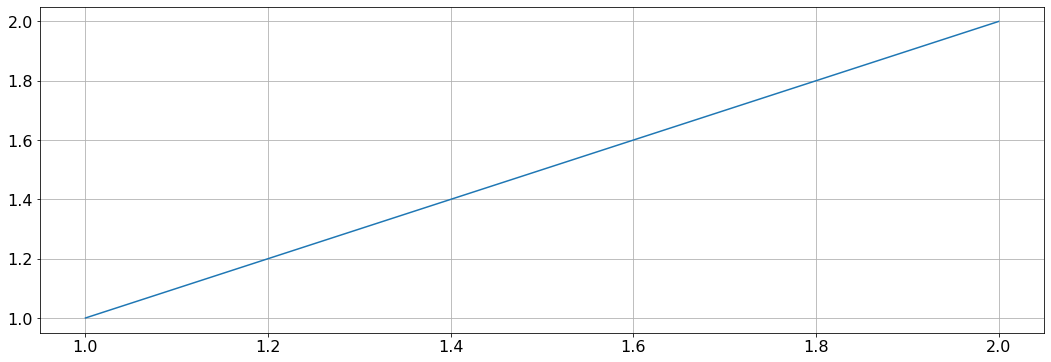

In [18]:
fig, ax = plt.subplots()
ax.plot([1, 2], [1, 2])
matplotlib.rcParams['figure.figsize'] = [18, 6]


In [19]:
pd.__version__

'1.0.3'

# COVID_19

In [20]:
corona_mortality_tot = parameters.corona_mortality_tot[parameters.MOH_scenario]

In [21]:
normal_mortality_by_age = pd.read_csv(path_data.joinpath('mortality_2017_by_age.csv'), skiprows=[1,2,], index_col=0)
normal_mortality_by_age.index = text_interval_index_to_interval_index(normal_mortality_by_age.index, closed='both')
normal_mortality_by_age['both_sexes'] = normal_mortality_by_age.mails + normal_mortality_by_age.femails

In [22]:
age_pyramid = pd.read_csv(path_data.joinpath('israel_2019_age_pyramid.csv'), index_col=0)
age_pyramid.index = text_interval_index_to_interval_index(age_pyramid.index, closed='both')

In [23]:
residual_life_expectancy = pd.read_csv(path_data.joinpath('WHO_residual_life_expectancy_2016_by_group_age.csv'), index_col=0, skiprows=[1,])
residual_life_expectancy.index = text_interval_index_to_interval_index(residual_life_expectancy.index, closed='both')

In [24]:
DF_death = pd.read_csv(path_data.joinpath('health_office_models_runaway_distribution_of_death.csv'), index_col=0)
DF_death.loc['80-120', 'fraction_of_total_corona_mortality'] = 1 - DF_death.fraction_of_total_corona_mortality.sum()
DF_death.index =text_interval_index_to_interval_index(DF_death.index, closed='both')

DF_death['COVID_19_mortality'] = DF_death.fraction_of_total_corona_mortality * corona_mortality_tot

DF_death['normal_mortality'] = reduce_histogram_resolution(normal_mortality_by_age.both_sexes, DF_death.index)

DF_death['population'] = reduce_histogram_resolution(age_pyramid.M + age_pyramid.F, DF_death.index)

In [25]:
if parameters.corona_normal_death_overlap_model == 'independent':
    DF_death['net_COVID_19_mortality'] = DF_death.COVID_19_mortality * (1 - DF_death.normal_mortality / DF_death.population)
elif parameters.corona_normal_death_overlap_model == 'full_correlation':
    raise(NotImplementedError('check before use'))
    (DF_death.corona_mortality - DF_death.normal_mortality).clip(0)
elif parameters.corona_normal_death_overlap_model == 'estimate_1':
    p_corona_death_given_normal_death = 0.25 # not arbitrary, to be explained: 2017 death stats: 80% of death from underlying desease / risk factor
    # also severe scenario: 80% of population are sick. let's make a hardening assumption: ortigonality
    # from the group of those who had background desease severe enough to make them die, and also got corona, how many would be finished by the corona?
    # at least a third
    DF_death['net_corona_mortality'] = (DF_death.corona_mortality - DF_death.normal_mortality * p_corona_death_given_normal_death).clip(0)


In [26]:

DF_death['residual_life_expectancy'] = reduce_histogram_resolution(residual_life_expectancy.mean(axis=1), DF_death.index) / 2

In [27]:
DF_death['COVID_19_lost_life_years'] = DF_death.residual_life_expectancy * DF_death.net_COVID_19_mortality
DF_death['normally_lost_life_years'] = DF_death.residual_life_expectancy * DF_death.normal_mortality
DF_death['COVID_19_to_normally_lost_life_years'] = DF_death.COVID_19_lost_life_years / DF_death.normally_lost_life_years
DF_death.index.name = 'age_group'

In [28]:
df_death = DF_death

In [29]:
df_death

fraction_of_total_corona_mortality  COVID_19_mortality  \
age_group                                                           
[0, 9]                                  0.000                 0.0   
[10, 19]                                0.001                21.6   
[20, 29]                                0.007               151.2   
[30, 39]                                0.015               324.0   
[40, 49]                                0.028               604.8   
[50, 59]                                0.079              1706.4   
[60, 69]                                0.241              5205.6   
[70, 79]                                0.303              6544.8   
[80, 120]                               0.326              7041.6   

           normal_mortality  population  net_COVID_19_mortality  \
age_group                                                         
[0, 9]                219.0   1654530.0                0.000000   
[10, 19]              246.0   1377821.0               21.596143   
[20, 29]              420.0   1178880.0              151.146132   
[30, 39]              604.0   1117905.0              323.824944   
[40, 49]             1211.0   1019070.0              604.081293   
[50, 59]             2643.0    779142.0             1700.611562   
[60, 69]             5892.0    702437.0             5161.935735   
[70, 79]             8896.0    430872.0             6409.672768   
[80, 120]           24220.0    258715.0             6382.389858   

           residual_life_expectancy  COVID_19_lost_life_years  \
age_group                                                       
[0, 9]                       79.500                  0.000000   
[10, 19]                     70.075               1513.349754   
[20, 29]                     60.225               9102.775795   
[30, 39]                     50.450              16336.968424   
[40, 49]                     40.725              24601.210655   
[50, 59]                     31.350              53314.172467   
[60, 69]                     22.500             116143.554041   
[70, 79]                     14.425              92459.529675   
[80, 120]                     8.150              52016.477339   

           normally_lost_life_years  COVID_19_to_normally_lost_life_years  
age_group                                                                  
[0, 9]                    17410.500                              0.000000  
[10, 19]                  17238.450                              0.087789  
[20, 29]                  25294.500                              0.359872  
[30, 39]                  30471.800                              0.536134  
[40, 49]                  49317.975                              0.498828  
[50, 59]                  82858.050                              0.643440  
[60, 69]                 132570.000                              0.876092  
[70, 79]                 128324.800                              0.720512  
[80, 120]                197393.000                              0.263517

# Spending and life expectancy

## life expectancy

In [30]:
df_0 = pd.read_csv(path_data.joinpath('WHO_residual_life_expectancy_by_year_group_age.csv'), index_col=0, header=[0, 1], skiprows=[2,], )
df_0.index = text_interval_index_to_interval_index(df_0.index, closed='both')
df_0.index.name = 'age_group'
df_0.columns.names = ['year', 'sex']
df_0.sort_index(axis=1, inplace=True)


dfs = df_0.swaplevel('year', 'sex', axis=1)
df = (dfs['Male'] + dfs['Female']) / 2

residual_life_expectancy = df.swapaxes(0, 1)
residual_life_expectancy.index = pd.to_numeric(residual_life_expectancy.index)

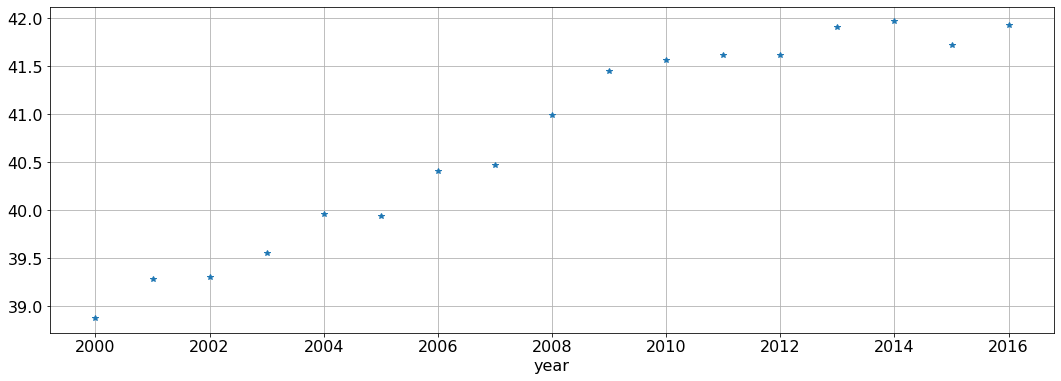

In [31]:
residual_life_expectancy.mean(axis=1).plot(linestyle='', marker='*')

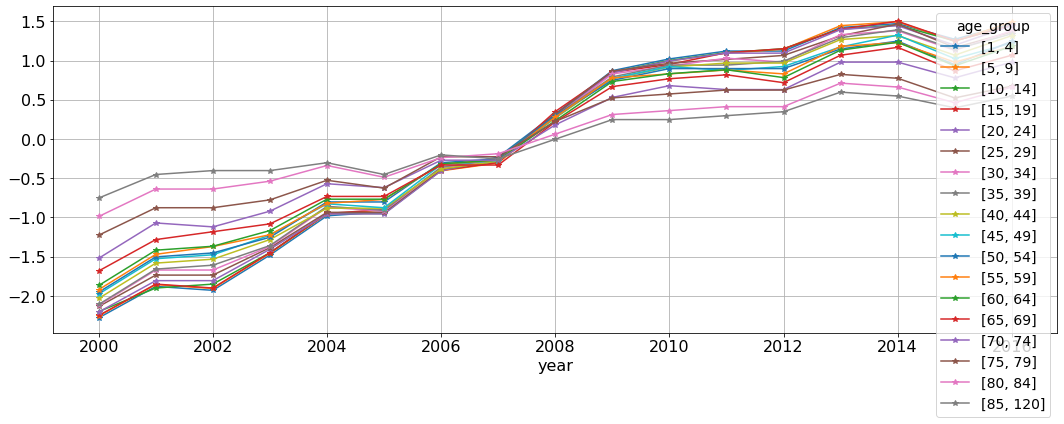

In [32]:
(residual_life_expectancy - residual_life_expectancy.mean(axis=0)).rename(columns=lambda k : str(k)).plot(linestyle='-', marker='*')

In [33]:
residual_life_expectancy_diff = residual_life_expectancy.diff(axis=0)

In [34]:
residual_life_expectancy_yearly_increace_by_age = residual_life_expectancy_diff.mean(axis=0)

In [35]:
age_pyramid = pd.read_csv(path_data.joinpath('israel_2019_age_pyramid.csv'), index_col=0)
age_pyramid.index = text_interval_index_to_interval_index(age_pyramid.index, closed='both')
age_pyramid = age_pyramid.M + age_pyramid.F
age_pyramid = reduce_histogram_resolution(age_pyramid, residual_life_expectancy_yearly_increace_by_age.index)
#age_pyramid.plot.bar(rot=0)

In [36]:
total_remaining_life_years_yearly_increace_by_age = residual_life_expectancy_yearly_increace_by_age * age_pyramid
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age = total_remaining_life_years_yearly_increace_by_age / residual_life_expectancy.loc[2016, :]


## health spending

In [37]:
df_health_expenditure = pd.read_csv(path_data.joinpath('israel_health_spending_inflation_adjusted.csv'), index_col=0)

In [38]:
population = pd.read_csv(path_data.joinpath('israel_demographic_table_wikipedia.csv'), index_col=0, usecols=[0,1,], squeeze=True)
population = population.loc[df_health_expenditure.index]

In [39]:
df_health_expenditure['nis_per_capita'] = df_health_expenditure.total_health_spending_millions_nis_inflation_adjusted_2015 / (population / 1000)

In [40]:
health_spending_per_capita_yearly_increase = df_health_expenditure.nis_per_capita.diff().median()


In [41]:
yearly_increase_health_spending_per_capita_nis = health_spending_per_capita_yearly_increase

## adaptation

In [42]:
#total_remaining_life_years_yearly_increace_by_age = pd.read_csv(path_results.joinpath('total_remaining_life_years_yearly_increace_by_age.csv'), index_col=0, squeeze=True)
#total_remaining_life_years_yearly_increace_by_age.index = closed_ranges_to_interval_index(total_remaining_life_years_yearly_increace_by_age.index)
total_remaining_life_years_yearly_increace_by_age = reduce_histogram_resolution(total_remaining_life_years_yearly_increace_by_age, df_death.index)
total_remaining_life_years_yearly_increace_by_age.name = 'total_remaining_life_years_yearly_increace_by_age'

In [43]:
#total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age = pd.read_csv(path_results.joinpath('total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.csv'), index_col=0, squeeze=True)
#total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.index = closed_ranges_to_interval_index(total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.index)
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age = reduce_histogram_resolution(total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age, df_death.index)
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.name = 'health-spending-reduction life equivalent'

In [44]:
est_ministry_of_finance_damage_billions_of_nis = parameters.est_ministry_of_finance_damage_billions_of_nis[parameters.MOF_scenario]

In [45]:
print(f'MOH: {parameters.MOH_scenario}, MOF: {parameters.MOF_scenario}')

MOH: 4, MOF: F


In [46]:
df_health_expenditure = pd.read_csv(path_data.joinpath('israel_health_spending_inflation_adjusted.csv'), index_col=0)
population = pd.read_csv(path_data.joinpath('israel_demographic_table_wikipedia.csv'), index_col=0, usecols=[0,1,], squeeze=True)


### health spending per capita cuts due to extreme lockdown

In [47]:


israel_2016_health_expenditure = df_health_expenditure.total_health_spending_millions_nis_inflation_adjusted_2015.loc[2016]
health_spending_loss_nis_per_capita =  est_ministry_of_finance_damage_billions_of_nis / parameters.est_israel_gdp_2019_billions_of_nis * israel_2016_health_expenditure / (population.loc[2016] / 1000)
#loss_nis_per_capita = 
health_spending_loss_nis_per_capita

612.854824822836

In [48]:
years_rollback = health_spending_loss_nis_per_capita / yearly_increase_health_spending_per_capita_nis
years_rollback

3.5655648387468917

## conclusion: 

approx (not current health spending not current population but 2016, should fine tune nis 2020 nis 2015, easily mended):

In [49]:
print(f"loss of {health_spending_loss_nis_per_capita} nis per capita of health spending. eauivalent of having health spending like {years_rollback} years back")

loss of 612.854824822836 nis per capita of health spending. eauivalent of having health spending like 3.5655648387468917 years back


# prepare params string

In [50]:
params_string = f'GDP loss: {parameters.est_ministry_of_finance_damage_billions_of_nis[parameters.MOF_scenario]} [Billions NIS]\nCOVID_19 mortality: {parameters.corona_mortality_tot[parameters.MOH_scenario]}'
print(params_string)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#\nHealth spending per capita cuts: {health_spending_loss_nis_per_capita:.0f} [NIS]  

GDP loss: 82 [Billions NIS]
COVID_19 mortality: 21600


## comparison

### mortality, or mortaliy equivalent (statistical mortality

In [51]:
loss_of_life_years_related_to_health_spending_cuts = total_remaining_life_years_yearly_increace_by_age * parameters.health_spending_weight_in_residual_life_expectancy * years_rollback
loss_of_life_years_related_to_health_spending_cuts.name = 'health-spending-reduction related lost life years'

In [52]:
cmp_mortality = pd.concat([parameters.health_spending_weight_in_residual_life_expectancy * years_rollback * total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age, df_death.loc[:, ['COVID_19_mortality', 'net_COVID_19_mortality', ]]], axis=1)
cmp = pd.concat([loss_of_life_years_related_to_health_spending_cuts, df_death.COVID_19_lost_life_years], axis=1)


### total life years lost ratio

In [53]:
cmp.sum()['health-spending-reduction related lost life years'] / cmp.sum()['COVID_19_lost_life_years']

8.708291031236291

In [54]:
_ = rougher_binning(cmp, pd.IntervalIndex.from_tuples([(0, 49), (50, 120)], closed='both'), 'sum')
_['lost_to_saved_life_years_ratio'] = _['health-spending-reduction related lost life years'] / _.COVID_19_lost_life_years
_

health-spending-reduction related lost life years  \
[0, 49]                                         2.530525e+06   
[50, 120]                                       6.522507e+05   

           COVID_19_lost_life_years  lost_to_saved_life_years_ratio  
[0, 49]                51554.304628                       49.084659  
[50, 120]             313933.733523                        2.077670

In [55]:
cmp.rename(columns = {'health-spending-reduction related lost life years' : 'Life years lost due to GDP decline'}, inplace=True)

In [59]:
cmp_mortality = cmp_mortality[['health-spending-reduction life equivalent', 'net_COVID_19_mortality']].rename(columns={'health-spending-reduction life equivalent' : 'Mortality due to GDP decline', 'net_COVID_19_mortality' : 'COVID-19 mortality'})
cmp_mortality

Mortality due to GDP decline  COVID-19 mortality
age_group                                                  
[0, 9]                      8696.148148            0.000000
[10, 19]                    8047.393468           21.596143
[20, 29]                    7797.706639          151.146132
[30, 39]                    8594.731411          323.824944
[40, 49]                    9133.108353          604.081293
[50, 59]                    8737.765018         1700.611562
[60, 69]                   10129.657538         5161.935735
[70, 79]                    7324.732723         6409.672768
[80, 120]                   5262.544051         6382.389858

### ploting comparison mortality 1

In [ ]:
if IS_PLOT:
    fig, (ax, ax_50) = plt.subplots(2, 1, figsize=(16, 16))

    cmp_mortality.plot.bar(ax=ax, rot=0, color=['C3', 'green', 'orange'])
    title = f'Health-spending cuts related mortality vs COVID-19 related mortality (scenario {parameters.scenario_number})'
    ax.set_title(title)
    ax.text(0.1, 0.95, params_string, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

    cmp_mortality.iloc[-4:, :].plot.bar(ax=ax_50, title='above age 50 only', rot=0, color=['C3', 'green', 'orange'])
    title = f'Health-spending cuts related mortality vs COVID-19 related mortality, age > 50 (scenario {parameters.scenario_number})'
    ax_50.set_title(title)
    ax_50.text(0.1, 0.95, params_string, transform=ax_50.transAxes, fontsize=10, verticalalignment='top', bbox=props)

if IS_SAVEFIG:
    fig = ax.get_figure()
    fig.savefig(path_results.joinpath(title + '.jpeg'))



### plotting comparison mortality 2

In [72]:
np.round(cmp_mortality.sum()).astype(int)

Mortality due to GDP decline    73724
COVID-19 mortality              20755
dtype: int64

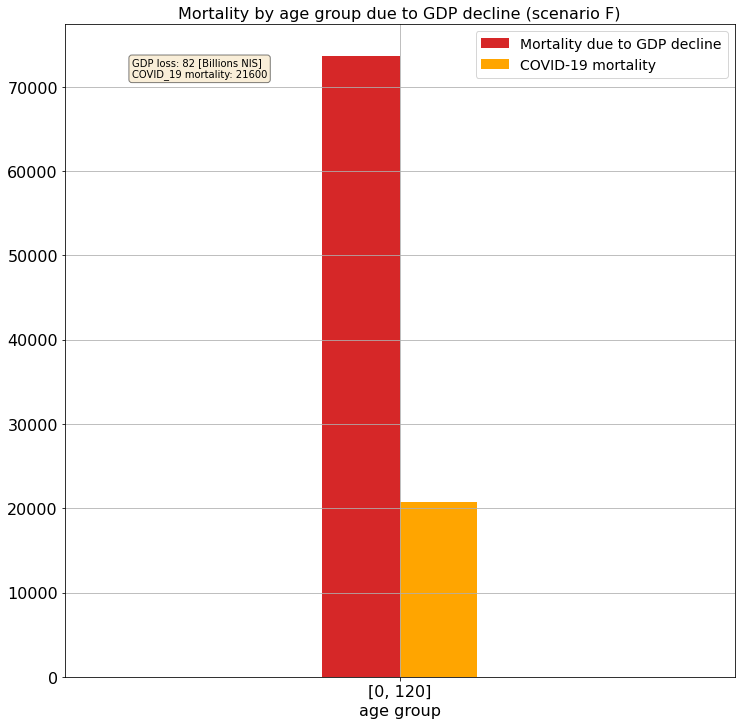

In [77]:
if IS_PLOT:
    width = 0.15
    #cmp_mortality = pd.concat([parameters.health_spending_weight_in_residual_life_expectancy * years_rollback * total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age, df_death.loc[:, ['COVID_19_mortality', 'net_COVID_19_mortality', ]]], axis=1)
    ax = rougher_binning(cmp_mortality, pd.IntervalIndex.from_tuples([(0, 120)], closed='both', name='age group'), 'sum').plot.bar(width=width, rot=0, color=['C3', 'orange'], figsize=(12, 12))
    title = f'Mortality by age group due to GDP decline (scenario {parameters.scenario_number})'
    
    ax.set_title(title)
    ax.text(0.1, 0.95, params_string, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

if IS_SAVEFIG:
    fig = ax.get_figure()
    fig.savefig(path_results.joinpath(title + '.jpeg'))

In [ ]:
if IS_PLOT:
    ax = cmp_mortality.iloc[-4:, :].plot.bar(title='above age 50 only', rot=0, color=['C3', 'green', 'orange'])
    title = f'Health-spending cuts related mortality vs COVID-19 related mortality, age > 50 (scenario {parameters.scenario_number})'
    ax.set_title(title)
    ax.text(0.1, 0.95, params_string, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

if IS_SAVEFIG:
    fig = ax.get_figure()
    fig.savefig(path_results.joinpath(title + '.jpeg'))

### plotting loss of life years 1

In [60]:
index_ = pd.IntervalIndex.from_tuples([(0, 39), (40, 69), (70, 120)], closed='both')
index_.name = 'age_group'
index_

IntervalIndex([[0, 39], [40, 69], [70, 120]],
              closed='both',
              name='age_group',
              dtype='interval[int64]')

In [64]:
index_2 = pd.IntervalIndex.from_tuples([(0, 29), (30, 59), (60, 120)], closed='both')
index_2.name = 'age_group'

In [ ]:
if IS_PLOT:
    fig, (ax_70, ax) = plt.subplots(2, 1, figsize=(16, 16))
    
    #ax.yaxis.set_major_formatter(mf)
    rougher_binning(cmp, index_, 'sum').plot.bar(ax=ax, rot=0, color=['C3', 'orange'])
    title = f'Total loss of life years by age group due to health spending cuts,  (scenario {parameters.scenario_number})'
    ax.set_title(title, fontsize=20)
    ax.text(0.1, 0.95, params_string, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)  
    
    #width = ax.patches[0].get_width()
    width = 0.15
    rougher_binning(cmp, index_, 'sum').iloc[2:].plot.bar(ax=ax_70, width=width, rot=0, color=['C3', 'orange'])
    title = f'Total loss of life years by age group due to health spending cuts age > 70 (scenario {parameters.scenario_number})'
    ax_70.set_title(title, fontsize=20)
    ax_70.text(0.1, 0.95, params_string, transform=ax_70.transAxes, fontsize=10, verticalalignment='top', bbox=props)


if IS_SAVEFIG:    
    fig.savefig(path_results.joinpath(title + '.jpeg'))

### plotting loss of life years 2

In [61]:
cmp

Life years lost due to GDP decline  COVID_19_lost_life_years
age_group                                                              
[0, 9]                          691328.202264                  0.000000
[10, 19]                        564014.467202               1513.349754
[20, 29]                        469978.276917               9102.775795
[30, 39]                        432871.131654              16336.968424
[40, 49]                        372333.400744              24601.210655
[50, 59]                        273659.095862              53314.172467
[60, 69]                        227001.501609             116143.554041
[70, 79]                        109312.061726              92459.529675
[80, 120]                        42278.066673              52016.477339

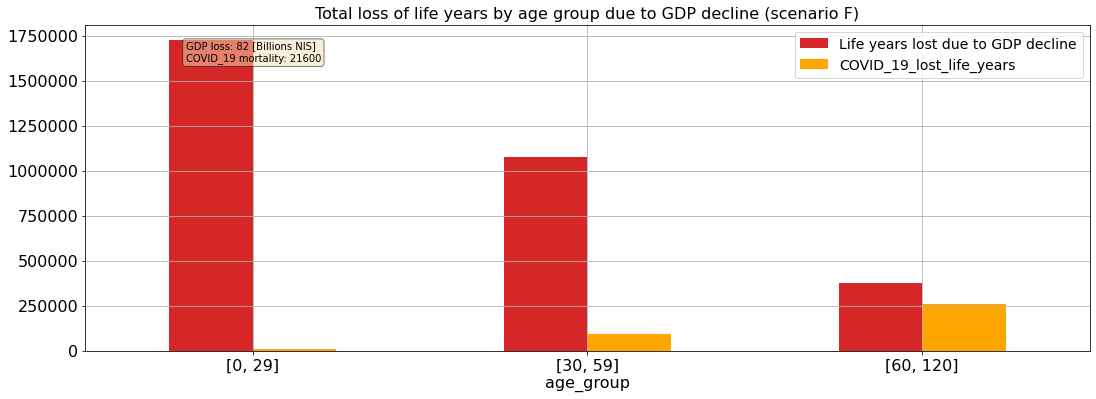

In [65]:
if IS_PLOT:
    ax = rougher_binning(cmp, index_2, 'sum').plot.bar(rot=0, color=['C3', 'orange'])
    title = f'Total loss of life years by age group due to GDP decline (scenario {parameters.scenario_number})'
    ax.set_title(title)
    ax.text(0.1, 0.95, params_string, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

if IS_SAVEFIG:
    fig = ax.get_figure()
    fig.savefig(path_results.joinpath(title + '.jpeg'))

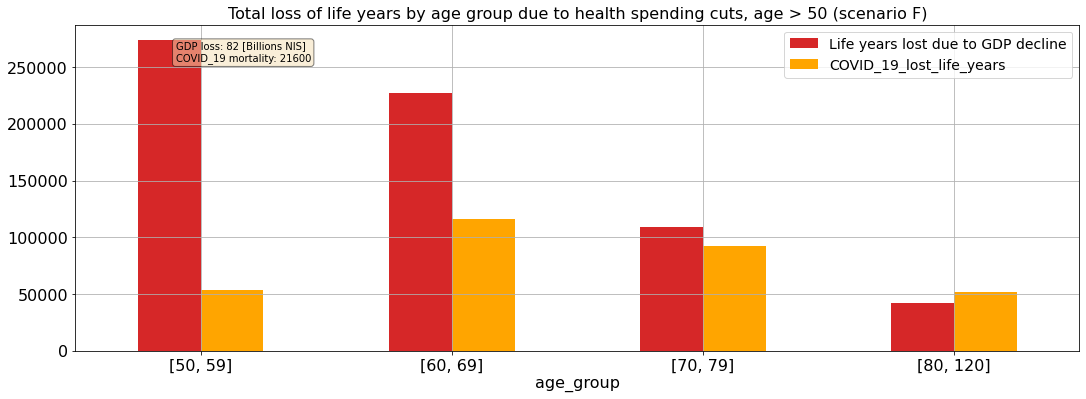

In [63]:
if IS_PLOT:
    ax = cmp.iloc[-4:, :].plot.bar(title='above age 50 only', rot=0, color=['C3', 'orange'])
    title = f'Total loss of life years by age group due to health spending cuts, age > 50 (scenario {parameters.scenario_number})'
    ax.set_title(title)
    ax.text(0.1, 0.95, params_string, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

if IS_SAVEFIG:
    fig = ax.get_figure()
    fig.savefig(path_results.joinpath(title + '.jpeg'))

In [ ]:
if IS_PLOT:
    width = 0.15
    ax = rougher_binning(cmp, index_, 'sum').iloc[2:].plot.bar(width=width, rot=0, color=['C3', 'orange'])
    title = f'Total loss of life years due to GDP decline age > 70 (scenario {parameters.scenario_number})'
    ax.set_title(title, fontsize=15)
    ax.text(0.1, 0.95, params_string, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)

if IS_SAVEFIG:
    fig = ax.get_figure()
    fig.savefig(path_results.joinpath(title + '.jpeg'))